<a href="https://colab.research.google.com/github/yugpatelyp2/CE888/blob/main/Lab8/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/sample_data/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Get all the paths
#data_dir_list = os.listdir('/content/data/horses')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/data/cats"))
file_count = len(files)
print("No of files in cats",file_count)
path, dirs, files = next(os.walk("/content/data/dogs"))
file_count = len(files)
print("No of files in dogs",file_count)
path, dirs, files = next(os.walk("/content/data/horses"))
file_count = len(files)
print("No of files in horses",file_count)
path, dirs, files = next(os.walk("/content/data/Humans"))
file_count = len(files)
print("No of files in Humans",file_count)

No of files in cats 202
No of files in dogs 202
No of files in horses 202
No of files in Humans 202


In [ ]:
# Make new base directory
original_dataset_dir_cats = "/content/data/cats"
original_dataset_dir_dogs = "/content/data/dogs"
original_dataset_dir_horses = "/content/data/horses"
original_dataset_dir_humans = "/content/data/Humans"
base_dir = "/content/cats_dogs_horses_human"
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

import shutil
fnames = ['horse-{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
path, dirs, files = next(os.walk("/content/cats_dogs_horses_human/train"))
file_count = len(files)
print("No of train files ",file_count)

path, dirs, files = next(os.walk("/content/cats_dogs_horses_human/validation"))
file_count = len(files)
print("No of validation files ",file_count)

path, dirs, files = next(os.walk("/content/cats_dogs_horses_human/test"))
file_count = len(files)
print("No of test files ",file_count)

No of train files  560
No of validation files  124
No of test files  120


In [ ]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [ ]:
#def label_img(img):
#  word_label = img.split('-')[0]
#  if word_label == 'dog': return 1
#  elif word_label == 'cat': return 0
#  if word_label == 'horse': return 2
#  elif word_label == 'rider': return 3

In [ ]:
def label_img(img):
  #print(img)
  if img.find('-')!=-1:
      #print(img)
      word_label = img.split('-')[0]
      if word_label == 'horse': return 2
      elif word_label == 'rider': return 3
      
  else :
      word_label = img.split('.')[0]
      if word_label == 'dog': return 1
      elif word_label == 'cat': return 0

In [ ]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
       
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [ ]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [ ]:
# Our vectorized labels
#train_y = train_y.reshape((-1,1))
#val_y=val_y.reshape((-1,1))
#y_test = np.asarray(test_labels).astype('float32').reshape((-1,1))

In [ ]:
## VGG 16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input, Flatten,Dropout
from tensorflow.keras import Model
from keras.layers.normalization import BatchNormalization
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
last_layer = model.get_layer('fc2').output
out = Dense(4, activation='sigmoid', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=11, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
56/56 [==============================] - 3s 40ms/step - loss: 1.3475 - acc: 0.4183 - val_loss: 0.6686 - val_acc: 0.7661
Epoch 2/10
56/56 [==============================] - 2s 36ms/step - loss: 0.5395 - acc: 0.8024 - val_loss: 0.6434 - val_acc: 0.7339
Epoch 3/10
56/56 [==============================] - 2s 37ms/step - loss: 0.4569 - acc: 0.8544 - val_loss: 0.3986 - val_acc: 0.8710
Epoch 4/10
56/56 [==============================] - 2s 36ms/step - loss: 0.3506 - acc: 0.8926 - val_loss: 0.3971 - val_acc: 0.8629
Epoch 5/10
56/56 [==============================] - 2s 36ms/step - loss: 0.3332 - acc: 0.8883 - val_loss: 0.5240 - val_acc: 0.7742
Epoch 6/10
56/56 [==============================] - 2s 36ms/step - loss: 0.3819 - acc: 0.8348 - val_loss: 0.4199 - val_acc: 0.8710
Epoch 7/10
56/56 [==============================] - 2s 36ms/step - loss: 0.2700 - acc: 0.8940 - val_loss: 0.2991 - val_acc: 0.9113
Epoch 8/10
56/56 [==============================] - 2s 36ms/step - loss: 0.2360 - a

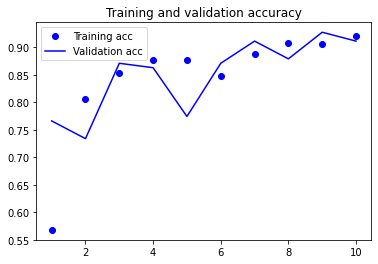

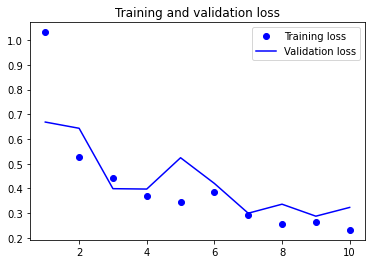

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
#ypred = predictions > 0.5
ypred = np.argmax(predictions, axis=1)
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

#auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
#print("AUC:\t\t", auc)

Train Accuracy:	 0.9214285612106323
Val Accuracy:	 0.9112903475761414
Test Accuracy:	 0.925
Precision:	 0.9296416788856305
Recall:		 0.925
F1 Score:	 0.9236966247807072


In [ ]:
## Inception V3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
n=4
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_11class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_11class.log')

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
56/56 [==============================] - 11s 96ms/step - loss: 1.5357 - accuracy: 0.2808 - val_loss: 0.9757 - val_accuracy: 0.7177
Epoch 2/10
56/56 [==============================] - 4s 72ms/step - loss: 1.0482 - accuracy: 0.6891 - val_loss: 0.6406 - val_accuracy: 0.8790
Epoch 3/10
56/56 [==============================] - 4s 72ms/step - loss: 0.7741 - accuracy: 0.8149 - val_loss: 0.5053 - val_accuracy: 0.9355
Epoch 4/10
56/56 [==============================] - 4s 72ms/step - loss: 0.5825 - accuracy: 0.8731 - val_loss: 0.4378 - val_accuracy: 0.9435
Epoch 5/10
56/56 [==============================] - 4s 72ms/step - loss: 0.4661 - accuracy: 0.9251 - val_loss: 0.3910 - val_accuracy: 0.9435
Epoch 6/10
56/56 [==============================] - 4s 72ms/step - loss: 0.4041 - accuracy: 0.9230 - val_loss: 0.3534 - val_accuracy: 0.9355
Epoch 7/10
56/56 [==============================] - 4s 72ms/step - loss: 0.3393 - accuracy: 0.9324 - val_loss: 0.3248 - val_accuracy: 0.9516
Epoch 8/10
5

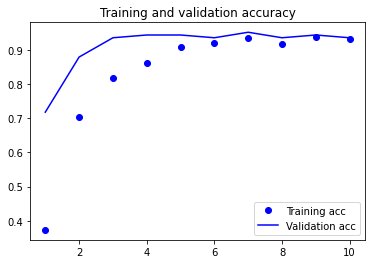

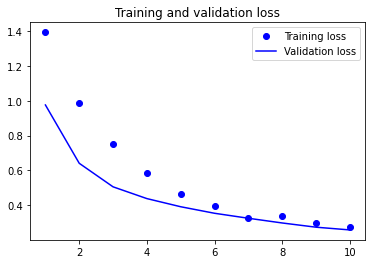

In [ ]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
#ypred = predictions > 0.5
ypred = np.argmax(predictions, axis=1)
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

#auc = roc_auc_score(test_y, ypred,average='macro')

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
#print("AUC:\t\t", auc)

Train Accuracy:	 0.9321428537368774
Val Accuracy:	 0.9354838728904724
Test Accuracy:	 0.9416666666666667
Precision:	 0.944575968013468
Recall:		 0.9416666666666667
F1 Score:	 0.9414156916205977


In [ ]:
#VGG16 with FT
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='sigmoid', name='output')(x)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(train_X, train_y,
                              batch_size=20,
                              epochs=20, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

Epoch 1/20
28/28 [==============================] - 2s 71ms/step - loss: 1.4617 - acc: 0.5200 - val_loss: 0.3321 - val_acc: 0.8548
Epoch 2/20
28/28 [==============================] - 2s 65ms/step - loss: 0.1318 - acc: 0.9576 - val_loss: 0.2755 - val_acc: 0.8871
Epoch 3/20
28/28 [==============================] - 2s 65ms/step - loss: 0.0169 - acc: 0.9987 - val_loss: 0.2588 - val_acc: 0.9194
Epoch 4/20
28/28 [==============================] - 2s 65ms/step - loss: 0.0074 - acc: 1.0000 - val_loss: 0.2596 - val_acc: 0.9113
Epoch 5/20
28/28 [==============================] - 2s 65ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.2588 - val_acc: 0.9194
Epoch 6/20
28/28 [==============================] - 2s 65ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.2607 - val_acc: 0.9274
Epoch 7/20
28/28 [==============================] - 2s 65ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.2643 - val_acc: 0.9194
Epoch 8/20
28/28 [==============================] - 2s 65ms/step - loss: 0.0014 - a

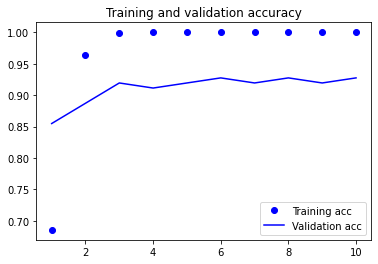

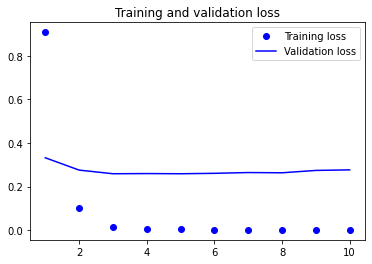

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:

## Test Accuracy
predictions = model.predict(test_X)
#ypred = predictions > 0.5
ypred = np.argmax(predictions, axis=1)
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

#auc = roc_auc_score(test_y, ypred,average='macro')

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
#print("AUC:\t\t", auc)

Train Accuracy:	 1.0
Val Accuracy:	 0.9274193644523621
Test Accuracy:	 0.925
Precision:	 0.9273193191026732
Recall:		 0.925
F1 Score:	 0.9240379892231969


In [ ]:
#inception V3 FE
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception_model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_189[0][0]    
_______________________________________________________________________________________

In [ ]:
#Adding the last layer to the model
from tensorflow.keras import layers
last_layer = Flatten()(inception_model.output)
out = Dense(4, activation='sigmoid', name='output')(last_layer) 
inception_model = Model(img_input, out)

for layer in inception_model.layers[:-1]:
	layer.trainable = False

inception_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_189[0][0]    
____________________________________________________________________________________________

In [ ]:
incep.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#Early stopping criterion

my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='incpmodel.h5', save_best_only=True),
]

In [ ]:
#Fitting the model
history = incep.fit(train_X, train_y,
                               batch_size=10,
                               epochs=5, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/5
56/56 [==============================] - 6s 48ms/step - loss: 2.7977 - acc: 0.7318 - val_loss: 0.6709 - val_acc: 0.9516
Epoch 2/5
56/56 [==============================] - 2s 28ms/step - loss: 0.4620 - acc: 0.9650 - val_loss: 0.5763 - val_acc: 0.9194
Epoch 3/5
56/56 [==============================] - 2s 28ms/step - loss: 0.0289 - acc: 0.9916 - val_loss: 1.2724 - val_acc: 0.8952
Epoch 4/5
56/56 [==============================] - 2s 28ms/step - loss: 0.1549 - acc: 0.9830 - val_loss: 0.2722 - val_acc: 0.9677
Epoch 5/5
56/56 [==============================] - 2s 28ms/step - loss: 0.0036 - acc: 0.9972 - val_loss: 0.9654 - val_acc: 0.9113


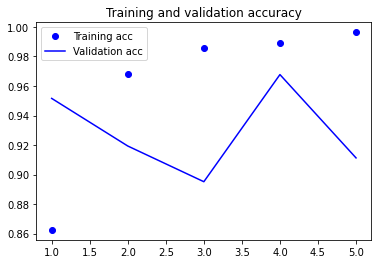

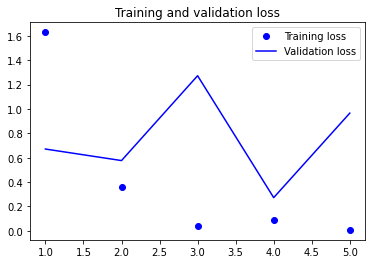

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = inception_model.predict(test_X)
#ypred = predictions > 0.5
ypred = np.argmax(predictions, axis=1)
test_acc = accuracy_score(test_y, ypred)


In [ ]:

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

#auc = roc_auc_score(test_y, ypred,average='macro')

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
#print("AUC:\t\t", auc)

Train Accuracy:	 0.9964285492897034
Val Accuracy:	 0.9112903475761414
Test Accuracy:	 0.9666666666666667
Precision:	 0.969208211143695
Recall:		 0.9666666666666667
F1 Score:	 0.9661397345823575


In [ ]:
#VGG19 Feature Extraction
model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
last_layer = model.get_layer('fc2').output
out = Dense(4, activation='sigmoid', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
56/56 [==============================] - 3s 47ms/step - loss: 1.3828 - acc: 0.4274 - val_loss: 0.7384 - val_acc: 0.7258
Epoch 2/10
56/56 [==============================] - 2s 44ms/step - loss: 0.6701 - acc: 0.7674 - val_loss: 0.6879 - val_acc: 0.7258
Epoch 3/10
56/56 [==============================] - 2s 44ms/step - loss: 0.5665 - acc: 0.7771 - val_loss: 0.8197 - val_acc: 0.6532
Epoch 4/10
56/56 [==============================] - 2s 43ms/step - loss: 0.4686 - acc: 0.8242 - val_loss: 0.5073 - val_acc: 0.8306
Epoch 5/10
56/56 [==============================] - 2s 43ms/step - loss: 0.4442 - acc: 0.8532 - val_loss: 0.5687 - val_acc: 0.7661
Epoch 6/10
56/56 [==============================] - 2s 43ms/step - loss: 0.3985 - acc: 0.8574 - val_loss: 0.4874 - val_acc: 0.8387
Epoch 7/10
56/56 [==============================] - 2s 44ms/step - loss: 0.3526 - acc: 0.8896 - val_loss: 0.4211 - val_acc: 0.8468
Epoch 8/10
56/56 [==============================] - 2s 44ms/step - loss: 0.4181 - a

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:




print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
#print("AUC:\t\t", auc)

Train Accuracy:	 0.8964285850524902
Val Accuracy:	 0.8629032373428345
Test Accuracy:	 0.9083333333333333
Precision:	 0.9085984169653525
Recall:		 0.9083333333333333
F1 Score:	 0.9075452048948389


In [ ]:
#VGG19 FT
model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

574717952/574710816 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='sigmoid', name='output')(x) 
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False


model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
56/56 [==============================] - 3s 47ms/step - loss: 1.7901 - acc: 0.4622 - val_loss: 0.5334 - val_acc: 0.8145
Epoch 2/10
56/56 [==============================] - 2s 43ms/step - loss: 0.2366 - acc: 0.9059 - val_loss: 0.3922 - val_acc: 0.8226
Epoch 3/10
56/56 [==============================] - 2s 43ms/step - loss: 0.0547 - acc: 0.9951 - val_loss: 0.4327 - val_acc: 0.8387
Epoch 4/10
56/56 [==============================] - 2s 43ms/step - loss: 0.0325 - acc: 1.0000 - val_loss: 0.2895 - val_acc: 0.8871
Epoch 5/10
56/56 [==============================] - 2s 43ms/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.2894 - val_acc: 0.9032
Epoch 6/10
56/56 [==============================] - 2s 43ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.3036 - val_acc: 0.8871
Epoch 7/10
56/56 [==============================] - 2s 43ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.2983 - val_acc: 0.9032
Epoch 8/10
56/56 [==============================] - 2s 43ms/step - loss: 0.0026 - a

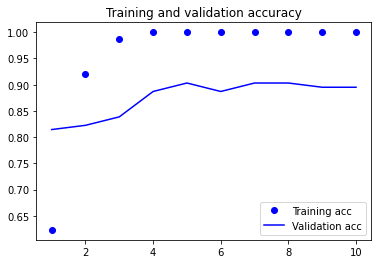

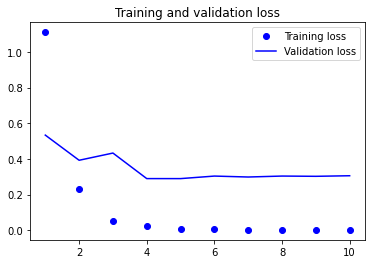

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

## Test Accuracy using accuracy score 
predictions = model.predict(test_X)

ypred = np.argmax(predictions, axis=1)
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')


print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)


Train Accuracy:	 1.0
Val Accuracy:	 0.8951612710952759
Test Accuracy:	 0.8666666666666667
Precision:	 0.8806818181818182
Recall:		 0.8666666666666667
F1 Score:	 0.8623459873459873
